## INPUTS

In [1]:
import time
startTime = time.time()
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss

In [2]:
'''
#**************************
#******NGC 7814 Bulge****
#*************************

# parameters for NGC 7814 provided in this paper: https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf 
#parameters 
n = 10       #concentration parameter (section 3.3 par.1)
re = 2.16    #effective radius, [kpc] (table 4)
L = 7e10     #bulge luminosity, [Lsun] (table 4)
ups = .71    #mass-to-light ratio of bulge given DM halo (table 5)
q = 0.61     #intrinsic axis ratio (table 4)
i=90         #inclination angle [degrees] (table 1)

#import GIPSY bulge for comparison bulge:
bulge = np.loadtxt('../../testing/7814reallybulge.dat')
prefactor=4.98 #from our fitting with NGC 7814
radii,k,b = bulge.T #ignore k
galaxy='7814'
'''

'''
#**************************
#******NGC 891 Bulge****
#*************************

# parameters for NGC 891 provided in this paper: https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf 
#parameters 
n = 10        #concentration parameter (section 3.3 par.1)
re = 1.8      #effective radius, [kpc] (table 4)
L = 2.2e10    #bulge luminosity, [Lsun] (table 4)
ups = 1.63    #mass-to-light ratio of bulge given DM halo (table 5)
q = 0.68      #intrinsic axis ratio (table 4)
i=89          #inclination angle [degrees] (table 1)

#import GIPSY bulge for comparison bulge:
bulge = np.loadtxt('../../NGC891/891_bulge.dat')
prefactor=1 #from our fitting with NGC 891???
radii,k,b = bulge.T #ignore k

galaxy='891'


'''
#**************************
#******NGC 5533 Bulge****
#*************************

# parameters for NGC 5533 provided in this paper: https://arxiv.org/pdf/0801.0870.pdf
#parameters 
n = 2.7        #concentration parameter (source???)
re = 2.6       #effective radius, [kpc] (source?)
L = 3.27e10    #bulge luminosity, [Lsun] (source?)
ups = 2.8      #mass-to-light ratio of bulge (table 1) for q=.33
q = 0.33       #intrinsic axis ratio
i=45           #inclination angle [degrees] (source???)

#import GIPSY bulge for comparison bulge:
bulge = np.loadtxt('../ngc 5533 total/data/NGC5533-bulge_fmt.txt')
prefactor=1 #this is a trace...
radii,b = bulge.T

galaxy='5533'

## Begin Code

In [3]:
i = i*(np.pi/180)                                  #inclination angle

 #gamma function
f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations
bn = root

I0 = (L*(bn**(2*n)))/(((re**2)*2*np.pi*n)*ss.gamma(2*n)) 

r0 = re/bn**n

print(r0)                              #in kpc
print(bn)
print(I0)

 #inner function
f = lambda x,m: ((np.exp(-np.power(x/r0, (1/n))))*(np.power(x/r0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2)));


0.032457790309459424
5.070574690730433
41024432058.25408


In [4]:
 #integrate inner function
g = lambda m: quad(f, m, np.inf,args=(m,))[0]
print(g(10))

4.2888694614208456e-06


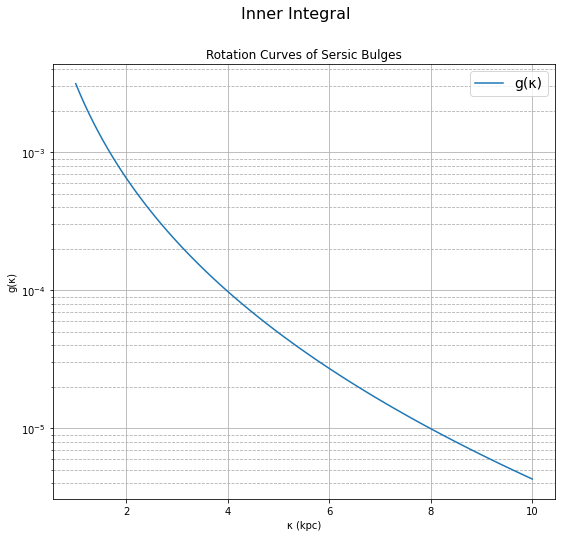

In [5]:
 #plotting inner integral
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #curves
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [6]:
#parameters 
#I0 = 4.1e10                                       #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)


 #equations
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

 #plot range
x = np.linspace(0.001, 19, 200)

 #integrate outer function
h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

y = np.zeros(np.shape(x))
for j,r in enumerate(x):
    hr = lambda m: h(m,r)
    yr = quad(h, 0, r,args=(r,))[0]
    y[j] = yr
    
 #equation
vb = np.sqrt(y)

<ipython-input-4-edd9186d0060>:2: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  g = lambda m: quad(f, m, np.inf,args=(m,))[0]
<ipython-input-4-edd9186d0060>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  g = lambda m: quad(f, m, np.inf,args=(m,))[0]


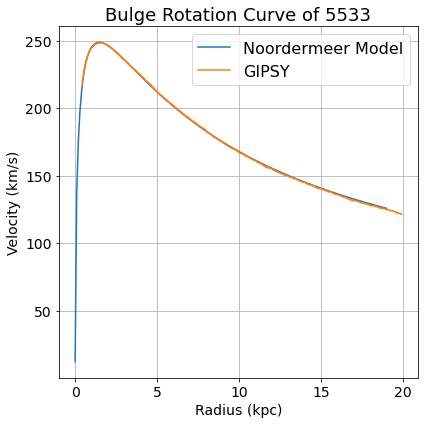

In [7]:


    #plotting bulge velocity curve

fig = plt.figure(figsize=(6.0,6.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


 #curves
plt.plot(x, vb, linestyle='solid', label='Noordermeer Model')          
plt.plot(radii, prefactor*b, linestyle='solid', label='GIPSY')          

 #labeling plots
#ax3.set_ylim(0,np.max(v)*1.3)
ax3.set_title(str('Bulge Rotation Curve of '+galaxy), fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Velocity (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.tight_layout()
plt.savefig('Plot1_n4.png')
plt.show()

In [8]:
executionTime = (time.time() - startTime)
print('Execution time in minutes: ' + str(executionTime/60))

Execution time in minutes: 2.680764043331146
